# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

# Read Dataset

In [ ]:
df = pd.read_csv("cancer.csv")
df.shape

(1000, 26)

In [ ]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


1.Age: Idade do paciente. (Numérico)

2.Gender: O gênero do paciente. (Categórico)

3.Air Pollution: O nível de exposição do paciente à poluição do ar. (Categórico)

4.Alcohol use: O nível de consumo de álcool do paciente. (Categórico)

5.Dust allergy: O nível de alergia à poeira do paciente. (Categórico)

6.OccuPational Hazards: O nível de riscos ocupacionais do paciente. (Categórico)

7.Genetic Risk: O nível de risco genético do paciente. (Categórico)

8.chronic Lung Disease: O nível de doença pulmonar crônica do paciente. (Categórico)

9.balanced diet: O nível de dieta balanceada do paciente. (Categórico)

10.Obesity: O nível de obesidade do paciente. (Categórico)

11.Smoking: O nível de tabagismo do paciente. (Categórico)

12.Passive Smoker: O nível de fumante passivo do paciente. (Categórico)

13.Chest Pain: O nível de dor no peito do paciente. (Categórico)

14.Coughing of Blood: O nível de tosse com sangue do paciente. (Categórico)

15.Fatigue: O nível de fadiga do paciente. (Categórico)

16.Weight Loss: O nível de perda de peso do paciente. (Categórico)

17.Shortness of Breath: O nível de falta de ar do paciente. (Categórico)

18.Wheezing: Nível de sibilância do paciente. (Categórico)

19.Swallowing Difficulty: O nível de dificuldade de deglutição do paciente. (Categórico)

20.Clubbing of Finger Nails: O nível de baqueteamento digital das unhas do paciente. (Categórico)

21.Frequent Cold: Resfriado frequente

22.Dry Cough: Tosse seca

23.Snoring: Ronco

24.Nível: nivel


# Clean Dataset

In [ ]:
# verificando se á dados nulos no meu dataset
print(df.isnull().sum())

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [ ]:
# verificar linhas duplicadas
duplicadas = df.duplicated()
print(duplicadas.sum())

0


# Data Analysis

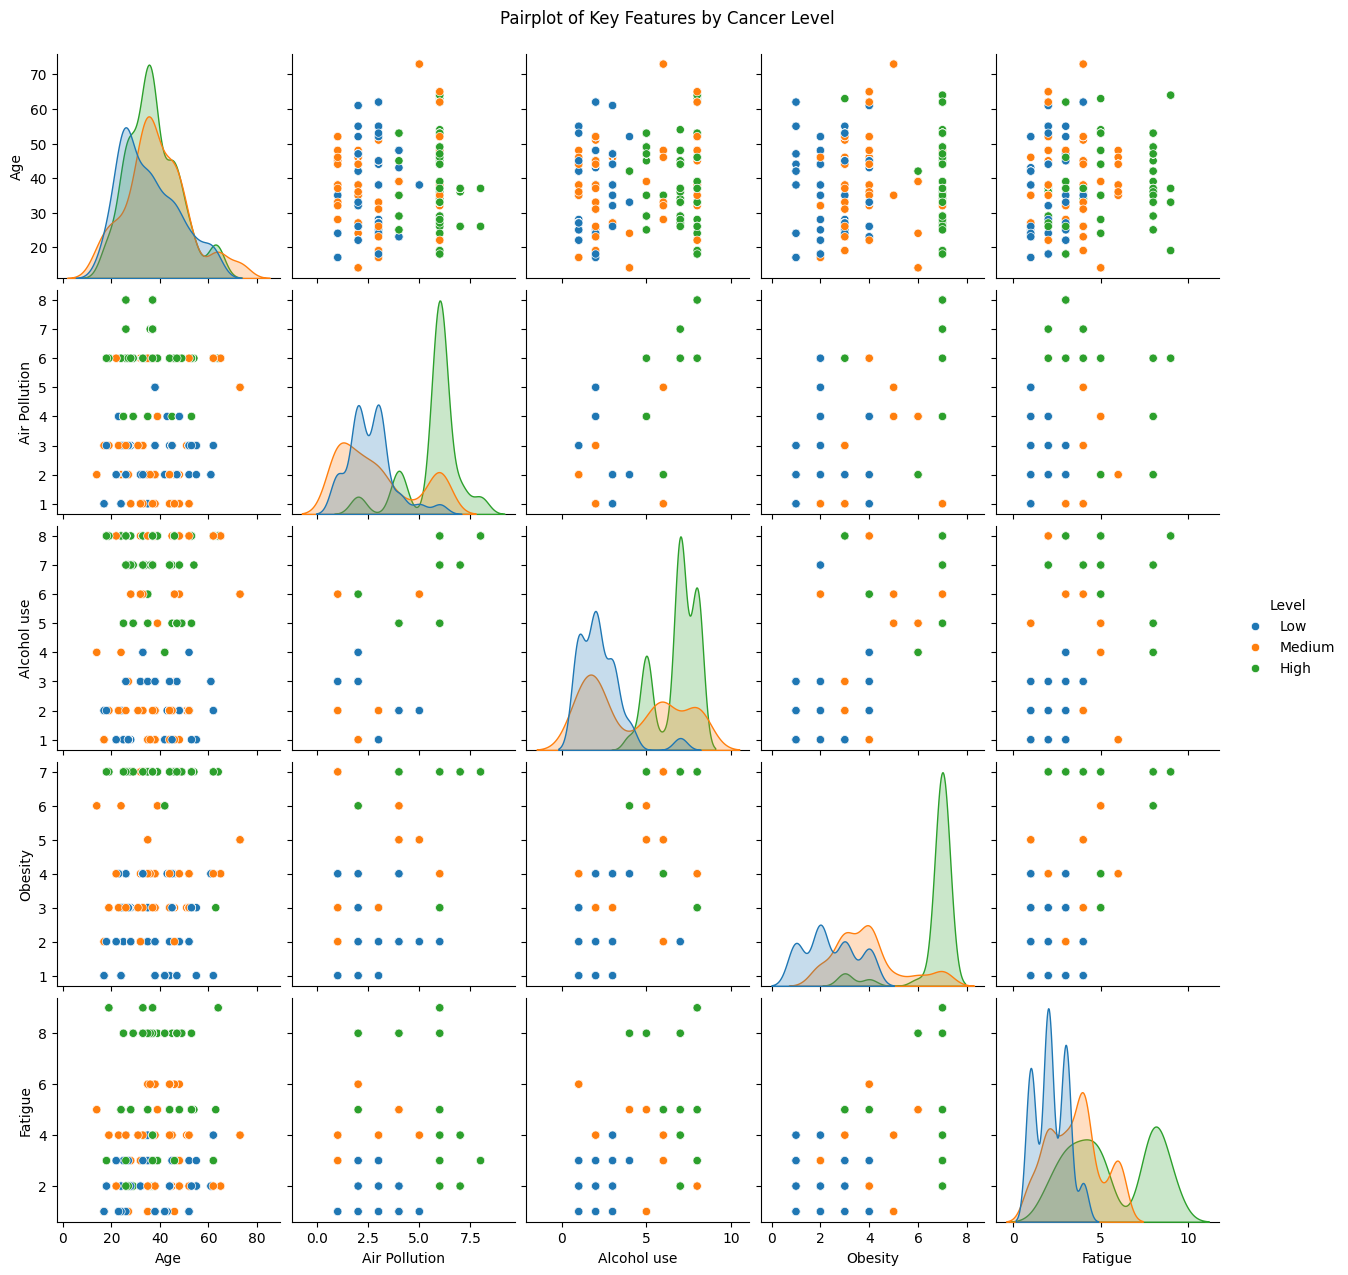

In [ ]:
# visualiza relações entre variáveis numéricas do DataFrame, separando por classes
sns.pairplot(df, hue="Level", vars=["Age", "Air Pollution", "Alcohol use", "Obesity", "Fatigue"])
plt.suptitle("Pairplot of Key Features by Cancer Level", y=1.02)
plt.show()

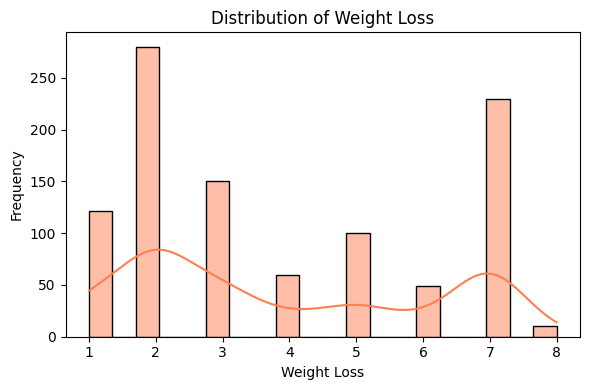

In [ ]:
# Distribuição dos pesos
plt.figure(figsize=(6, 4))
sns.histplot(df["Weight Loss"], bins=20, kde=True, color='coral')
plt.title("Distribution of Weight Loss")
plt.xlabel("Weight Loss")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

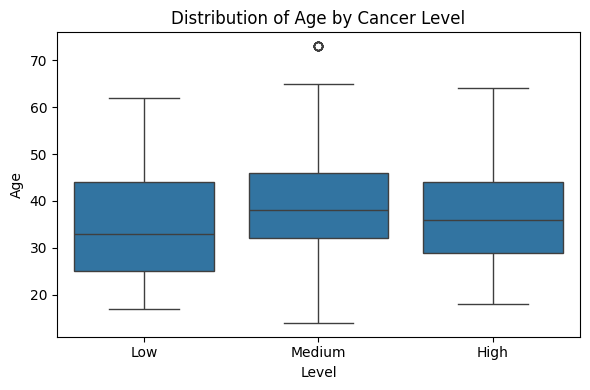

In [ ]:
# Grafico de ano por nível de câncer
plt.figure(figsize=(6, 4))
sns.boxplot(x="Level", y="Age", data=df)
plt.title("Distribution of Age by Cancer Level")
plt.tight_layout()
plt.show()

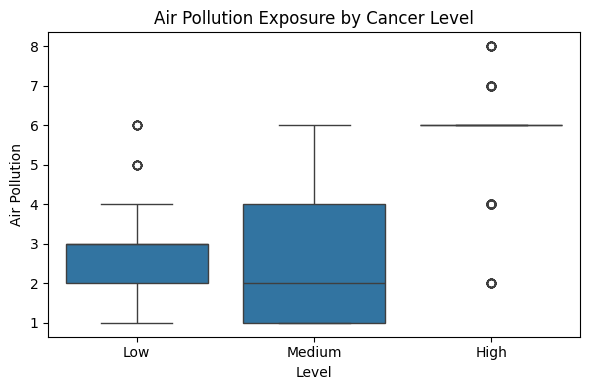

In [ ]:
# Grafico de poluicao do ar por nível de câncer
plt.figure(figsize=(6, 4))
sns.boxplot(x="Level", y="Air Pollution", data=df)
plt.title("Air Pollution Exposure by Cancer Level")
plt.tight_layout()
plt.show()

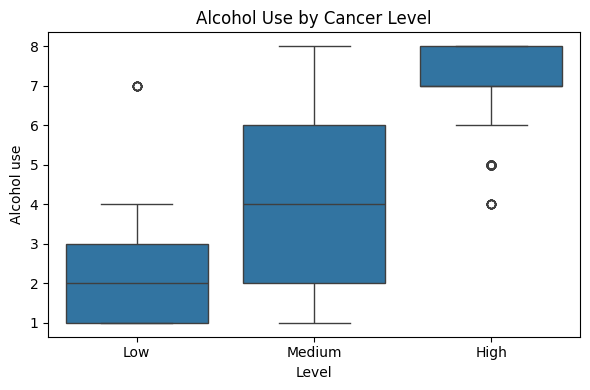

In [ ]:
# Grafico de consumo de álcool por nível de câncer
plt.figure(figsize=(6, 4))
sns.boxplot(x="Level", y="Alcohol use", data=df)
plt.title("Alcohol Use by Cancer Level")
plt.tight_layout()
plt.show()

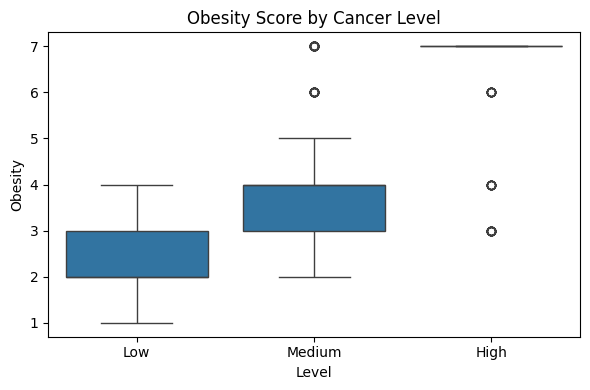

In [ ]:
# Grafico de obesidade por nível de câncer
plt.figure(figsize=(6, 4))
sns.boxplot(x="Level", y="Obesity", data=df)
plt.title("Obesity Score by Cancer Level")
plt.tight_layout()
plt.show()

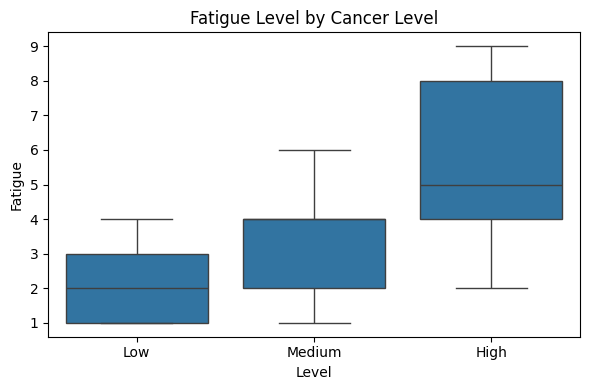

In [ ]:
# Grafico de fadiga por nível de câncer
plt.figure(figsize=(6, 4))
sns.boxplot(x="Level", y="Fatigue", data=df)
plt.title("Fatigue Level by Cancer Level")
plt.tight_layout()
plt.show()

# Data Preprocessing

In [ ]:
# Dropando colunas irrelevantes
df_cleaned = df.drop(columns=["index", "Patient Id"])

In [ ]:
# Codificar variável alvo categórica para regressão logística
label_encoder = LabelEncoder()
df_cleaned["Level_encoded"] = label_encoder.fit_transform(df_cleaned["Level"])

In [ ]:
# Características e alvo para classificação
X_logistic = df_cleaned.drop(columns=["Level", "Level_encoded"])
y_logistic = df_cleaned["Level_encoded"]

# Model

## Logistic Regression Section

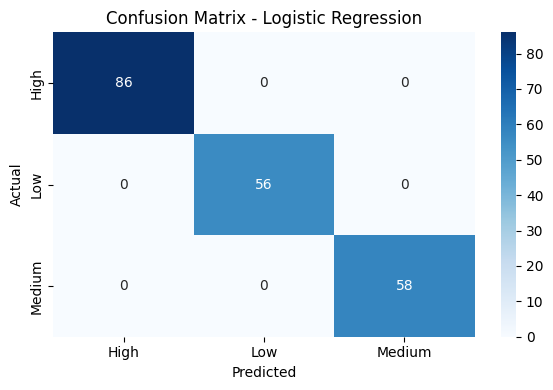


===== LOGISTIC REGRESSION =====
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        86
         Low       1.00      1.00      1.00        56
      Medium       1.00      1.00      1.00        58

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
# Características e alvo para classificação
X_logistic = df_cleaned.drop(columns=["Level", "Level_encoded"])
y_logistic = df_cleaned["Level_encoded"]

# Divisão de teste e treino para regressão logística
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_logistic, y_logistic, test_size=0.2, random_state=40
)

# Modelo de regressão logística de treino
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_log, y_train_log)
y_pred_log = log_model.predict(X_test_log)

# Avaliando Regressão Logística
log_metrics = classification_report(y_test_log, y_pred_log, output_dict=True)
conf_matrix = confusion_matrix(y_test_log, y_pred_log)

# Plotando matriz
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

print("\n===== LOGISTIC REGRESSION =====")
print(classification_report(y_test_log, y_pred_log, target_names=label_encoder.classes_))

## Linear Regression Section

In [ ]:
# classe alvo para regressão
X_linear = df_cleaned.drop(columns=["Weight Loss", "Level", "Level_encoded"])
y_linear = df_cleaned["Weight Loss"]

# dividindo os dados em treino e teste
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42
)

# treinando modelo de linear regression
lin_model = LinearRegression()
lin_model.fit(X_train_lin, y_train_lin)
y_pred_lin = lin_model.predict(X_test_lin)

# avaliando Linear Regression
lin_mse = mean_squared_error(y_test_lin, y_pred_lin)
lin_r2 = r2_score(y_test_lin, y_pred_lin)

print("\n===== LINEAR REGRESSION =====")
print(f"Mean Squared Error (MSE): {lin_mse:.2f}")
print(f"R^2 Score: {lin_r2:.2f}")


===== LINEAR REGRESSION =====
Mean Squared Error (MSE): 1.41
R^2 Score: 0.72


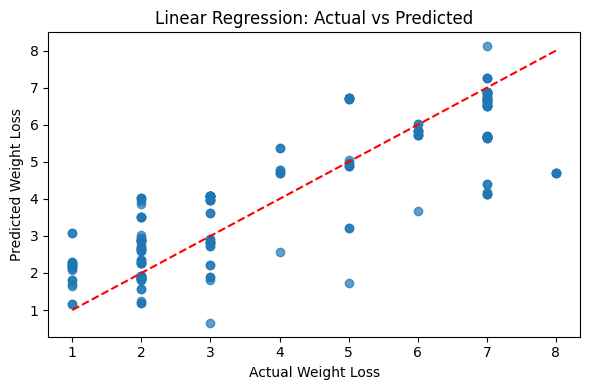

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersão dos valores reais vs preditos
plt.figure(figsize=(6, 4))
plt.scatter(y_test_lin, y_pred_lin, alpha=0.7)
plt.plot([y_test_lin.min(), y_test_lin.max()], [y_test_lin.min(), y_test_lin.max()], 'r--')
plt.xlabel("Actual Weight Loss")
plt.ylabel("Predicted Weight Loss")
plt.title("Linear Regression: Actual vs Predicted")
plt.tight_layout()
plt.show()

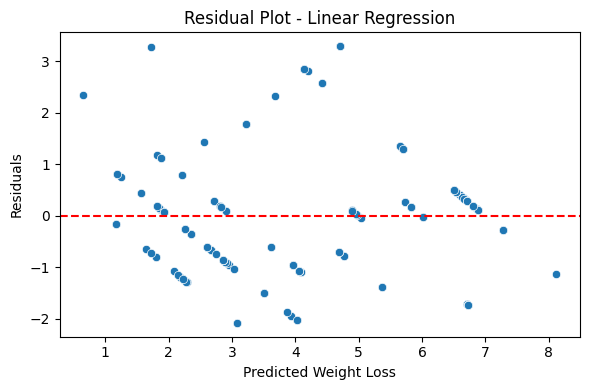

In [ ]:
# gráfico de resíduos (residual plot) para avaliar a qualidade do modelo de Regressão Linear, que está prevendo a variável Weight Loss.
residuals = y_test_lin - y_pred_lin
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_lin, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot - Linear Regression")
plt.xlabel("Predicted Weight Loss")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()